In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
%matplotlib inline
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (18, 10)
plt.rcParams['axes.titlesize'] = 16

In [3]:
typeSpecification = {"Aircraft Model": str, "Engine Model": str, "Engine3 Position": str, "Engine1 Position": str}
df = pd.read_csv('../database/aircraft_wildlife_strikes.zip', compression='zip', dtype=typeSpecification)

## Are there times of the year when more accidents occur?

This is a natural question to ask, taken into account that seasons influences animal's behavior. If this effect impacts the occurrences of strikes, we might perceive some seasonal tendencies in the data, which could motivate preemptive actions at the corresponding times of the year.

According to [this](https://www.perkypet.com/advice/bird-watching/bird-migration-facts/timing) source, the birds migrate to the south during late summer through the autumn and come back in the late winter. Our data also shows that most strike occurences are in Texas, Florida and California, which are southern states.

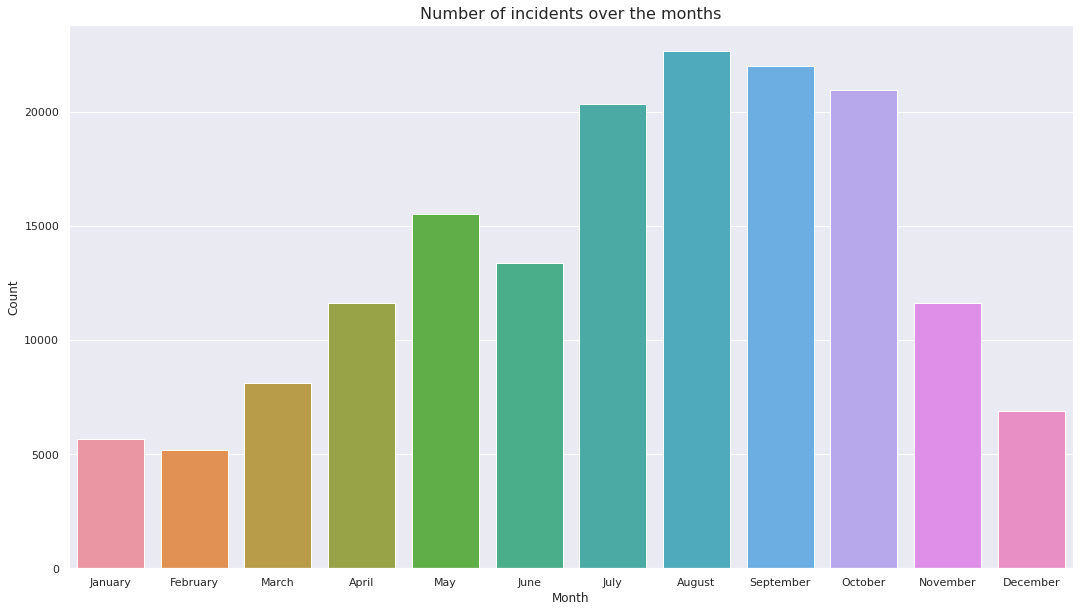

In [4]:
# Removing incidents in 2015, which would skew the data
months = [ "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December" ]
df = df[df['Incident Year'] != 2015]
incidents_by_month = df[['Record ID', 'Incident Month']].groupby('Incident Month').count().reset_index().rename(columns={'Record ID': 'Count'})
incidents_by_month['Month'] = incidents_by_month['Incident Month'].apply(lambda x: months[x - 1])
sns.barplot(data=incidents_by_month, x='Month', y='Count')
plt.title('Number of incidents over the months')
plt.show()

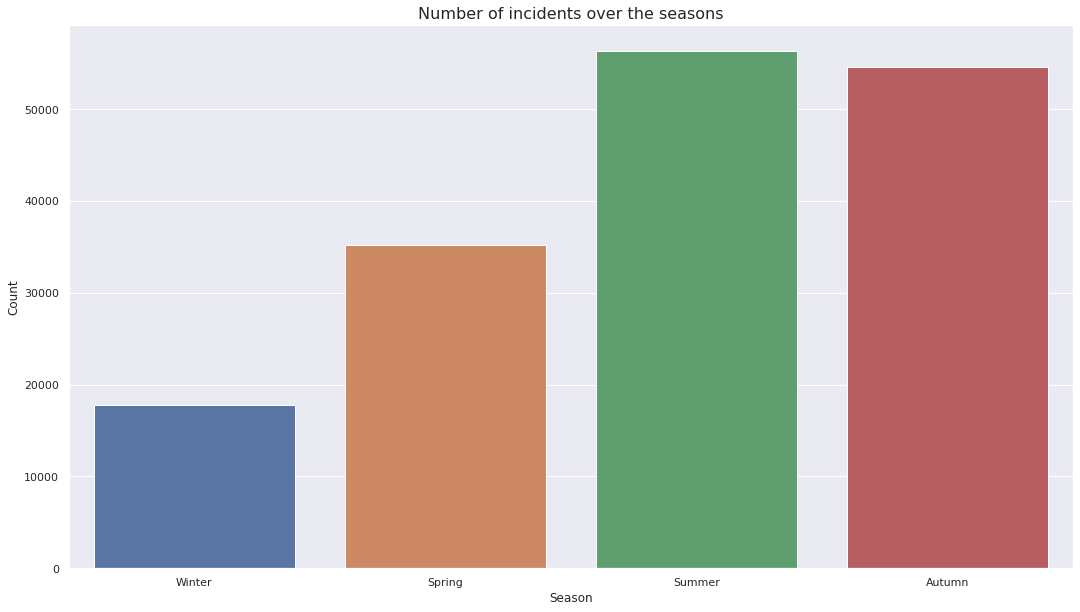

In [29]:
def season(month):
    if month == 12 or month <= 2:
        return 'Winter'
    elif month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    else:
        return 'Autumn'
incidents_by_month['Season'] = incidents_by_month['Incident Month'].apply(season)
incidents_by_season = incidents_by_month[['Month', 'Season', 'Count']].groupby('Season').sum().reset_index()
season_order = ["Winter", "Spring", "Summer", "Autumn"]
sns.barplot(data=incidents_by_season, x='Season', y='Count', order=season_order)
plt.title('Number of incidents over the seasons')
plt.show()

### Hypothesis 1: Most wildlife strikes occur in Summer and Autumn

In order to test this hypothesis, we can run an experiment with bootstrap. We take $1000$ samples of $1000$ elements from the data with reposition and compute an approximation to the confidence interval from the population.

The statistic considered is the proportion of strikes that occur in the Autumn and the Summer in comparison with the total number of strikes in the sample.

<AxesSubplot:ylabel='Count'>

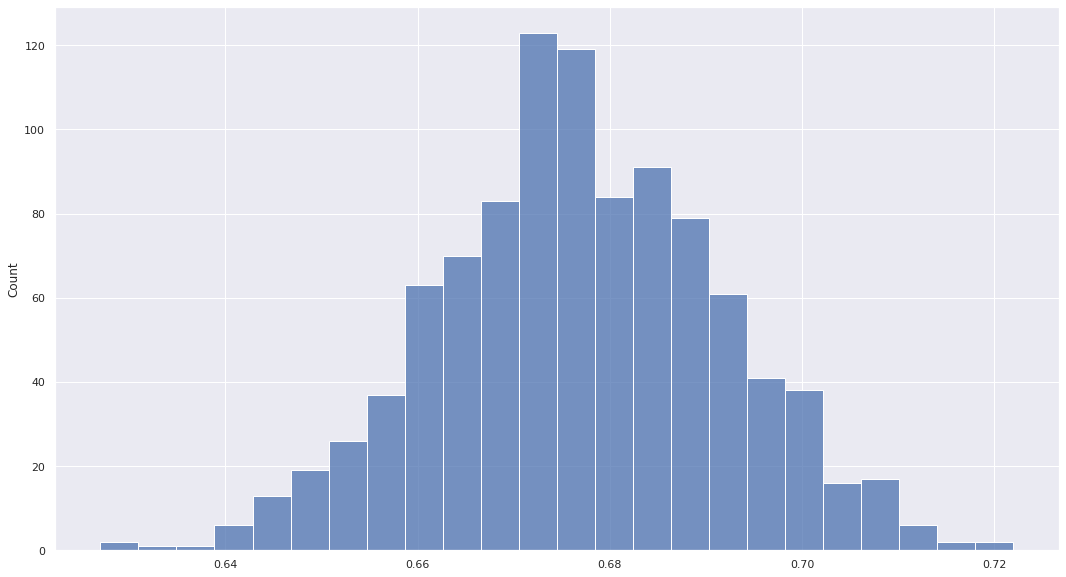

In [26]:
proportions = list()
bootstrap_df = df[['Record ID', 'Incident Month']]
for _ in range(1000):
    sample = bootstrap_df.sample(n = 1000, replace = True)
    sample['Season'] = sample['Incident Month'].apply(season)
    sample.reset_index(inplace=True)
    count_autumn_fall = len(sample[(sample['Season'] == 'Autumn') | (sample['Season'] == 'Summer')])
    proportions.append(count_autumn_fall / 1000)

sns.histplot(proportions)

In [27]:
print(f"Confidence Interval of 95%: [{np.percentile(proportions, 2.5)}, {np.percentile(proportions, 97.5)}]")

Confidence Interval of 95%: [0.647, 0.707]


In [ ]:
#TODO: calcular p-value e ver se aceita ou rejeita a hipotese